# 🧩 Notebook 03: Distribution Fitting and Evaluation with SciPy

In [1]:
# Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.distribution_utils import (
    fit_distribution,
    compute_pdf,
    compute_cdf,
    perform_ks_test,
    fit_multiple_distributions,
    fit_distributions_all_columns,
    fit_multiple_distributions_extended
)
from utils.viz_utils import (
    plot_pdf_overlay,
    plot_cdf_overlay,
    plot_multi_distribution_overlay,
    save_and_show_plot
)

from scipy.stats import norm, beta, gamma, expon, lognorm

# Constants
DATA_PATH = Path("../synthetic_data/exports")
EXPORT_PLOTS = Path("../exports/plots/03_distribution_fitting")
EXPORT_TABLES = Path("../exports/tables/03_distribution_fitting")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Load Synthetic Data

In [2]:
# Loading Dataset
df = pd.read_csv(DATA_PATH / "mixed_distributions.csv")
df.head()

,beta,gamma,exponential,lognorm,normal
0,0.353677,3.335097,2.186579,2.169920,54.755655
1,0.248558,1.697996,0.345795,1.709328,83.856325
2,0.415959,6.980145,0.582218,3.298741,98.408972
3,0.159968,3.421966,0.939599,2.340477,65.466821
4,0.550283,3.629245,4.302219,1.839290,54.508693


## 🔹 Step 2: Fit & Visualize a Distribution (Example: `gamma` on `gamma` column)

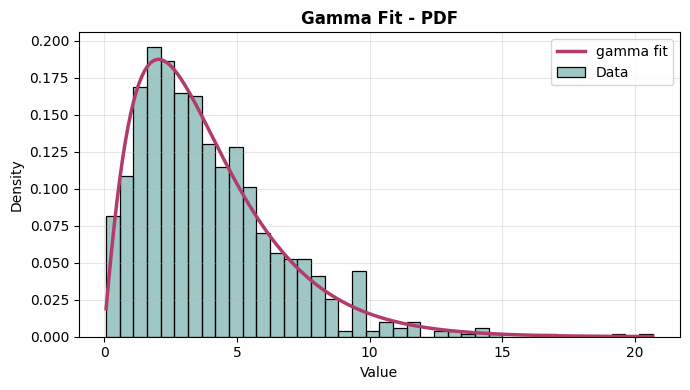

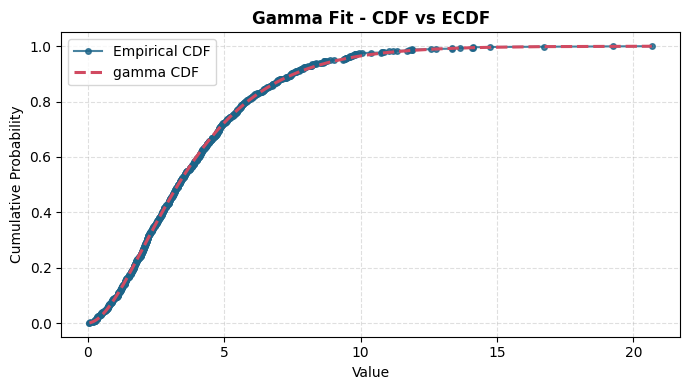

Gamma KS Test: {'KS_stat': np.float64(0.015182407951401578), 'p_value': np.float64(0.972606276185173)}


In [3]:
# Fit & Visualize a Distribution (Example: gamma on gamma column)

data = df['gamma']
params = fit_distribution(data, gamma)

# Plot PDF Overlay
fig = plot_pdf_overlay(data, gamma, params, title="Gamma Fit - PDF")
save_and_show_plot(fig, EXPORT_PLOTS / "gamma_pdf.png")

# Plot CDF vs ECDF
fig = plot_cdf_overlay(data, gamma, params, title="Gamma Fit - CDF vs ECDF")
save_and_show_plot(fig, EXPORT_PLOTS / "gamma_cdf_ecdf.png")

# KS Test
ks_result = perform_ks_test(data, gamma, params)
print("Gamma KS Test:", ks_result)

## 🔹 Step 3: Compare Multiple Fits (Normal, Gamma, LogNorm, Beta)

In [4]:
# Compare Multiple Fits (Normal, Gamma, LogNorm, Beta)
distribution_list = [norm, gamma, lognorm, beta]
fit_results = fit_multiple_distributions(data, distribution_list)
results_df = pd.DataFrame(fit_results)
results_df.to_csv(EXPORT_TABLES / "fit_results_gamma.csv", index=False)
results_df

/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


,distribution,params,KS_stat,p_value
0,norm,"(3.91752593963521, 2.7080998579042075)",0.0916,0.0000
1,gamma,"(2.10183060650095, -0.039145397807012, 1.88248...",0.0152,0.9726
2,lognorm,"(0.5292412407232169, -1.0751795065761662, 4.35...",0.0270,0.4524
3,beta,"(3.7541070642457104, 29.54359131981539, -1.201...",0.0492,0.0153


## 🔹 Step 4: Try Another Column (e.g., Lognormal)

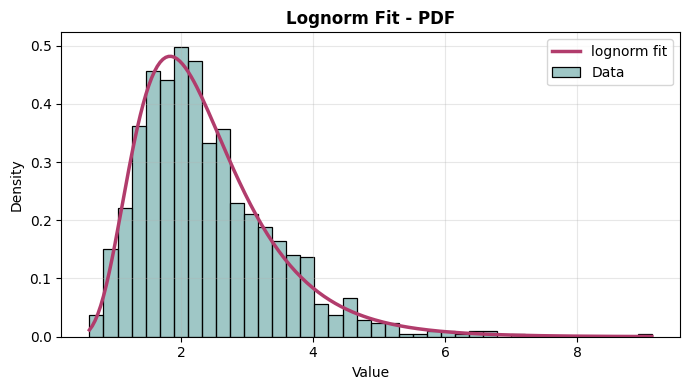

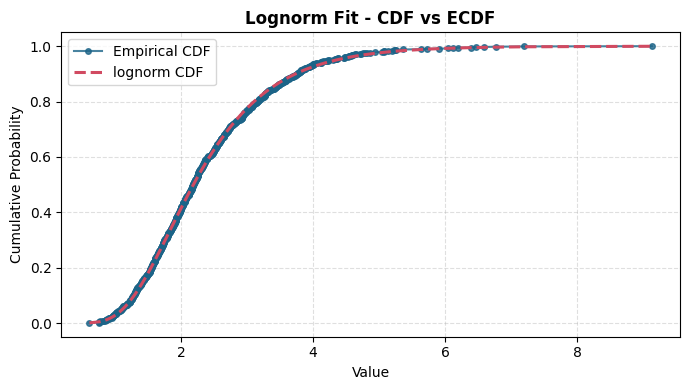

In [5]:
# Try Another Column (e.g., Lognormal)
data_lognorm = df['lognorm']
params_ln = fit_distribution(data_lognorm, lognorm)

fig = plot_pdf_overlay(data_lognorm, lognorm, params_ln, title="Lognorm Fit - PDF")
save_and_show_plot(fig, EXPORT_PLOTS / "lognorm_pdf.png")

fig = plot_cdf_overlay(data_lognorm, lognorm, params_ln, title="Lognorm Fit - CDF vs ECDF")
save_and_show_plot(fig, EXPORT_PLOTS / "lognorm_cdf_ecdf.png")


In [6]:
# Run for all columns
distribution_list = [norm, gamma, lognorm, beta, expon]
all_fit_results = fit_distributions_all_columns(df, distribution_list)
all_fit_results.to_csv(EXPORT_TABLES / "fit_results_all.csv", index=False)

/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:796: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


/Users/satvikpraveen/Desktop/Libraries/SciPyMasterPro/scipy_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


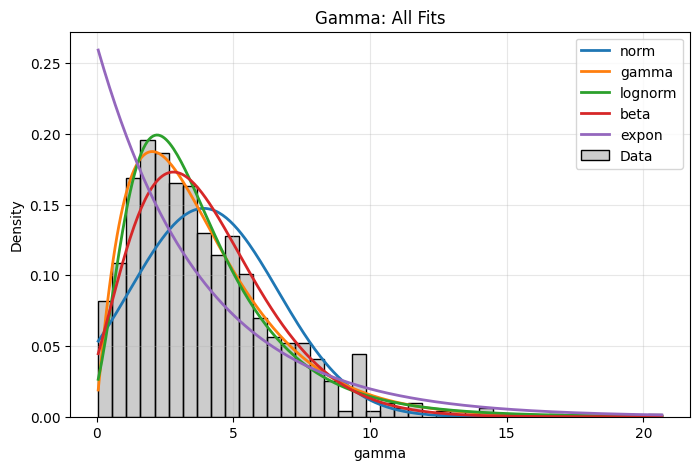

In [7]:
# Multi-overlay plot for "gamma" column
fig_overlay = plot_multi_distribution_overlay(df["gamma"], distribution_list, title="Gamma: All Fits")
save_and_show_plot(fig_overlay, EXPORT_PLOTS / "gamma_multi_overlay.png")

## 🔹 Step 5: Export PDF & CDF Values for Analytical Use

In [8]:
# Choose a column and distribution
target_col = "gamma"
target_data = df[target_col]

# Fit Gamma distribution
params_gamma = fit_distribution(target_data, gamma)

# Compute PDF & CDF values
x_pdf, pdf_vals = compute_pdf(target_data, gamma, params_gamma)
x_cdf, cdf_vals = compute_cdf(target_data, gamma, params_gamma)

# Export to CSV for downstream analysis
pdf_df = pd.DataFrame({"x": x_pdf, "pdf": pdf_vals})
cdf_df = pd.DataFrame({"x": x_cdf, "cdf": cdf_vals})

pdf_df.to_csv(EXPORT_TABLES / f"{target_col}_pdf_values.csv", index=False)
cdf_df.to_csv(EXPORT_TABLES / f"{target_col}_cdf_values.csv", index=False)

print(f"✅ Exported PDF and CDF values for '{target_col}' to tables folder.")


✅ Exported PDF and CDF values for 'gamma' to tables folder.


## 🧠 Key Takeaways
- SciPy distributions (rv_continuous) provide .fit(), .pdf(), .cdf() interfaces for powerful modeling
- ECDF vs CDF overlays help intuitively evaluate goodness-of-fit
- KS test (scipy.stats.kstest) offers a statistical test for fit quality
- Comparing multiple candidate distributions (e.g., normal vs gamma) is crucial for robust inference

## ✅ Summary
In this notebook, we:

- Loaded synthetic mixed distributions
- Fit gamma, lognorm, beta, and normal distributions using .fit()
- Visualized PDFs and CDFs over histogram/ECDFs
- Evaluated statistical fit using KS tests
- Exported fit metrics and plots to exports/